In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

In [70]:
data = np.loadtxt("results/coherent_test_T32_m2518_run.csv", delimiter=',')
eps_data = np.loadtxt("results/coherent_test_T32_m2518_eps.csv", delimiter=',')
data.shape, eps_data.shape

((1001, 1652), (2, 206))

In [71]:
N_bins = eps_data.shape[1]
N_steps = data.shape[0]

eps = eps_data[0,:]
weights = eps_data[1,:]
Tcm = data[:,len(data[0,:])-2]

In [72]:
nu_data = np.zeros((N_steps, N_bins, 4))
nubar_data = np.zeros_like(nu_data)

In [73]:
for i in range(N_steps):
    for j in range(N_bins):
        nu_data[i, j, :] = data[i, 2+4*j:2+4*j+4]
        nubar_data[i, j, :] = data[i, 2+4*N_bins+4*j:2+4*N_bins+4*j+4]

In [74]:
#number of steps by number of bins by neutrino/antineutrino
p0_vals = np.zeros((N_steps, N_bins, 2))
pmag_vals = np.zeros_like(p0_vals)
p0pz_vals = np.zeros_like(p0_vals)

In [75]:
for i in range(N_steps):
    for j in range(N_bins):
        p0_vals[i, j, 0] = nu_data[i,j,0]
        pmag_vals[i, j, 0] = np.sqrt(nu_data[i,j,1]**2 + nu_data[i,j,2]**2 + nu_data[i,j,3]**2)
        p0pz_vals[i, j, 0] = nu_data[i,j,0] * nu_data[i,j,3]

        p0_vals[i, j, 1] = nubar_data[i,j,0]
        pmag_vals[i, j, 1] = np.sqrt(nubar_data[i,j,1]**2 + nubar_data[i,j,2]**2 + nubar_data[i,j,3]**2)
        if(pmag_vals[i,j,1]==0):
            print(i)
            print(j)
            print("---------")
        p0pz_vals[i, j, 1] = nubar_data[i,j,0] * nu_data[i,j,3]

In [76]:
time = data[:,0]
entropy = np.zeros(len(time))

In [77]:
for i in range(len(entropy)):
    integrand = np.zeros((N_bins))

    for j in range(len(integrand)):
        #magnitude not p0pz
        eig1nu = 0.5*p0_vals[i,j,0] * (1 + pmag_vals[i,j,0])
        eig2nu = 0.5*p0_vals[i,j,0] * (1 - pmag_vals[i,j,0])
        if eig2nu<0:
            print(i, " ", j)

In [78]:
for i in range(len(entropy)):
    integrand = np.zeros((N_bins))

    for j in range(len(integrand)):
        #magnitude not p0pz
        eig1nu = 0.5*p0_vals[i,j,0] * (1 + pmag_vals[i,j,0])
        eig2nu = 0.5*p0_vals[i,j,0] * (1 - pmag_vals[i,j,0])
        eig1nubar = 0.5*p0_vals[i,j,1] * (1 + pmag_vals[i,j,1])
        eig2nubar = 0.5*p0_vals[i,j,1] * (1 - pmag_vals[i,j,1])
        integrand[j] = eps[j]**2 * (eig1nu*np.log(eig1nu) + eig2nu*np.log(eig2nu) + (1-eig1nu)*np.log(1-eig1nu) + (1-eig2nu)*np.log(1-eig2nu) + eig1nubar*np.log(eig1nubar) + eig2nubar*np.log(eig2nubar) + (1-eig1nubar)*np.log(1-eig1nubar) + (1-eig2nubar)*np.log(1-eig2nubar))
    
    entropy[i] = -Tcm[i]**3/(2*np.pi**2) * trapezoid(integrand, eps)

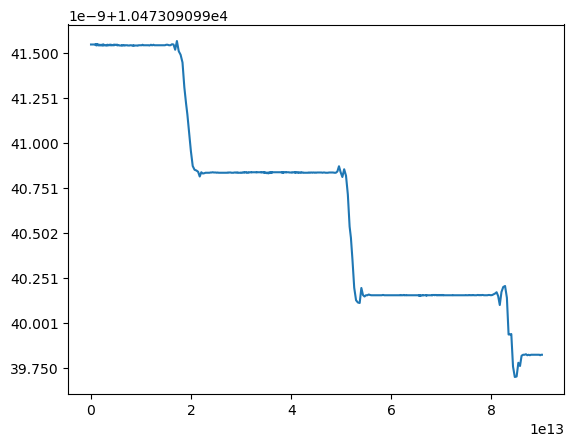

In [79]:
plt.figure()
plt.plot(time, entropy)
plt.show()